## 0. 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [2]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [3]:
df.shape

(202772, 12)

In [4]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [5]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_63666/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [6]:
df_v1 = df_age[df_age['품목대분류'] == '도서/음반 및 문구용품']
df_v1['품목대분류'].unique()

array(['도서/음반 및 문구용품'], dtype=object)

In [7]:
df_v1 = df_v1[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
20298,남자,5-9,예리함·마감처리 불량,자상(찔림),(부위)눈 및 눈주변(눈썹 및 눈꺼풀),주택 - 거실
20299,여자,35-39,예리함·마감처리 불량,자상(찔림),(부위)볼,"주택 - 상세불명의 장소, 부대·부속시설"
20300,여자,0-4,기타 물리적 충격,결막염 또는 안구손상,(부위)안구,주택 - 침실/방
20301,여자,0-4,예리함·마감처리 불량,절상(베임),(부위)손가락,주택 - 침실/방
20302,남자,5-9,예리함·마감처리 불량,결막염 또는 안구손상,(부위)안구,주택 - 거실


## 1. 빈발항목 분석

In [8]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
df_encoded.shape

(2713, 130)

In [10]:
sort_sum = pd.DataFrame(df_encoded.sum().sort_values(ascending=False)).iloc[:13].T

sort_sum = sort_sum.astype(float)

new_row = {}
for column in sort_sum.columns:
    new_row[column] = sort_sum.iloc[0][column] / df_v1.shape[0]

pd.concat([sort_sum, pd.DataFrame(new_row, index=[0])], ignore_index=True)

,예리함·마감처리 불량,남자,여자,0-4,주택 - 침실/방,열상(찢어짐),(부위)손가락,체내 위험 이물질,주택 - 거실,5-9,이물질(기타),"(부위)신체내부-소화계통(식도,위장,대장 등)",10-14
0,1504.000000,1498.000000,1214.000000,1188.000000,988.000000,947.00000,928.000000,926.00000,848.000000,823.000000,811.000000,549.000000,392.000000
1,0.554368,0.552156,0.447475,0.437892,0.364173,0.34906,0.342057,0.34132,0.312569,0.303354,0.298931,0.202359,0.144489


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canva

/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' no

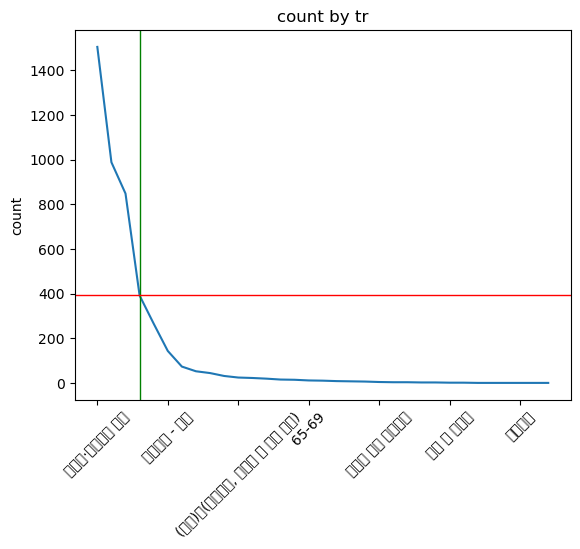

In [11]:
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
# plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=3, color='g', linewidth=1)
plt.axhline(y=392, color='r', linewidth=1)

plt.show()
# (17771, 457)

In [12]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
# frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
0,0.554368,(예리함·마감처리 불량)
1,0.552156,(남자)
4,0.447475,(여자)
5,0.437892,(0-4)
6,0.364173,(주택 - 침실/방 )
...,...,...
81,0.104681,"(남자, (부위)신체내부-소화계통(식도,위장,대장 등), 이물질(기타))"
71,0.102838,"(체내 위험 이물질, 주택 - 거실 , 이물질(기타))"
54,0.102470,"(절상(베임), (부위)손가락)"
55,0.101732,"(예리함·마감처리 불량, 절상(베임), (부위)손가락)"


In [13]:
frequent_itemsets.sort_values(by='support', ascending=False).head(35)

,support,itemsets
0,0.554368,(예리함·마감처리 불량)
1,0.552156,(남자)
4,0.447475,(여자)
5,0.437892,(0-4)
6,0.364173,(주택 - 침실/방 )
12,0.349060,(열상(찢어짐))
7,0.342057,((부위)손가락)
9,0.341320,(체내 위험 이물질)
40,0.331736,"(예리함·마감처리 불량, (부위)손가락)"
88,0.318467,"(열상(찢어짐), 예리함·마감처리 불량)"


#### 빈발집합 분석 결과

- 여자(0.44) 대비 남자(0.55). 남자의 비율이 더 높음.특별한 이유 추론 불가. 조심성 문제? ㅋㅋ

(예상가능)
- 도서이기 때문에 주택 내에서 발생한 위해사고가 많지 않을까 예상됨
- 더하여 예리함, 마감처리 불량으로 인한 손가락 사고가 많지 않을까 예상됨.

(주의)
- 0-4, 5-9, 10-14(아까 빈발 집합 항목에 존재) 항목들이 비율이 높음. 어린 아이들에게 위험도가 높음. 특히 0-4세의 아기들에게 많이 발생함.

(예상불가)
- 체내 위험 이물질, 소화계통은 왜 있는건지 예상 불가 > 나중에 추가 분석해보기로 함.

In [14]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.554368,(예리함·마감처리 불량),1
1,0.552156,(남자),1
2,0.312569,(주택 - 거실 ),1
3,0.303354,(5-9),1
4,0.447475,(여자),1


In [15]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2.sort_values(by='support', ascending=False).head(20)

,support,itemsets,length
40,0.331736,"(예리함·마감처리 불량, (부위)손가락)",2
88,0.318467,"(열상(찢어짐), 예리함·마감처리 불량)",2
15,0.308515,"(남자, 예리함·마감처리 불량)",2
62,0.280133,"(체내 위험 이물질, 이물질(기타))",2
30,0.245485,"(예리함·마감처리 불량, 여자)",2
33,0.244010,"(남자, 0-4)",2
57,0.225212,"(체내 위험 이물질, 0-4)",2
44,0.218577,"(열상(찢어짐), (부위)손가락)",2
49,0.214154,"(열상(찢어짐), (부위)손가락, 예리함·마감처리 불량)",3
89,0.205308,"(남자, 열상(찢어짐))",2


#### 2건 이상의 항목을 갖는 빈발집합 분석 결과

- 손가락, 예리함 / 찢어짐, 예리함 > 이러한 결과는 도서, 문구용품의 특성을 보았을 때 예상 가능한 영역임.

- 체내 위험 이물질, 소화계통 사고는 정말!! 특이함. 나중에 꼭 보아야함.

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

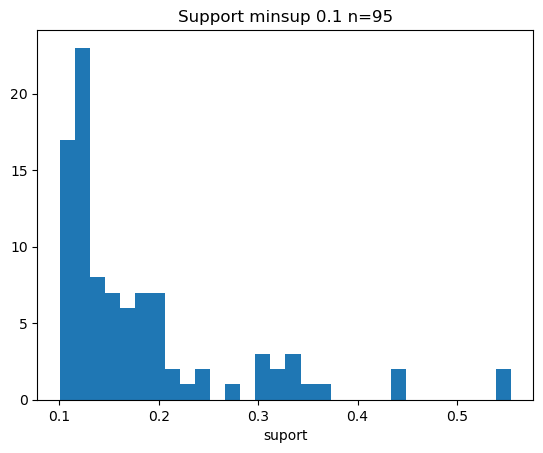

In [16]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsup {min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

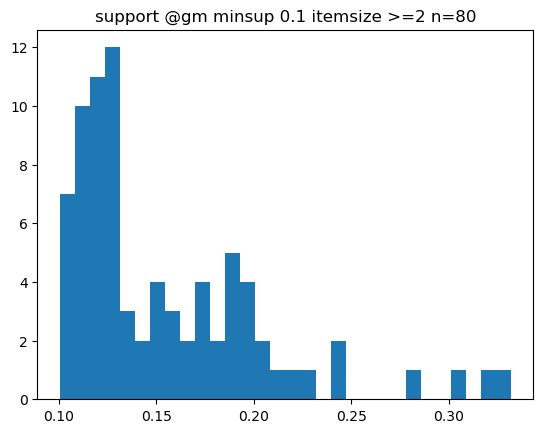

In [17]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'support @gm minsup {min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [18]:
#최소 지지도 0.1로 빈발 항목 집합을 분석한 결과에서 2개 이상의 항목을 포함하는 집합들 중 지지도가 높은 상위 항목 집합
freq_its_2[freq_its_2.support >= 0.30].sort_values(by='support', ascending=False)
#예상 가능한 영역의 결과만 나옴

,support,itemsets,length
40,0.331736,"(예리함·마감처리 불량, (부위)손가락)",2
88,0.318467,"(열상(찢어짐), 예리함·마감처리 불량)",2
15,0.308515,"(남자, 예리함·마감처리 불량)",2


## 2. 연관규칙 분석

In [19]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
53,"(절상(베임), (부위)손가락)",(예리함·마감처리 불량),0.102470,0.554368,0.101732,0.992806,1.790879,0.044927,61.942868,0.492033
30,"((부위)손가락, 0-4)",(예리함·마감처리 불량),0.120162,0.554368,0.118688,0.987730,1.781723,0.052074,36.319020,0.498666
12,"((부위)손가락, 5-9)",(예리함·마감처리 불량),0.117582,0.554368,0.115739,0.984326,1.775583,0.050555,28.431331,0.495009
50,(절상(베임)),(예리함·마감처리 불량),0.132326,0.554368,0.129746,0.980501,1.768684,0.056388,22.854563,0.500888
31,"(열상(찢어짐), (부위)손가락)",(예리함·마감처리 불량),0.218577,0.554368,0.214154,0.979764,1.767353,0.092982,22.021655,0.555630
...,...,...,...,...,...,...,...,...,...,...
108,"((부위)신체내부-소화계통(식도,위장,대장 등))","(남자, 이물질(기타))",0.202359,0.167342,0.104681,0.517304,3.091291,0.070818,1.725015,0.848139
69,(이물질(기타)),"(체내 위험 이물질, 남자)",0.298931,0.187615,0.154442,0.516646,2.753754,0.098358,1.680725,0.908412
57,(0-4),(체내 위험 이물질),0.437892,0.341320,0.225212,0.514310,1.506828,0.075751,1.356174,0.598379
3,(주택 - 거실 ),(예리함·마감처리 불량),0.312569,0.554368,0.159602,0.510613,0.921073,-0.013676,0.910593,-0.110837


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

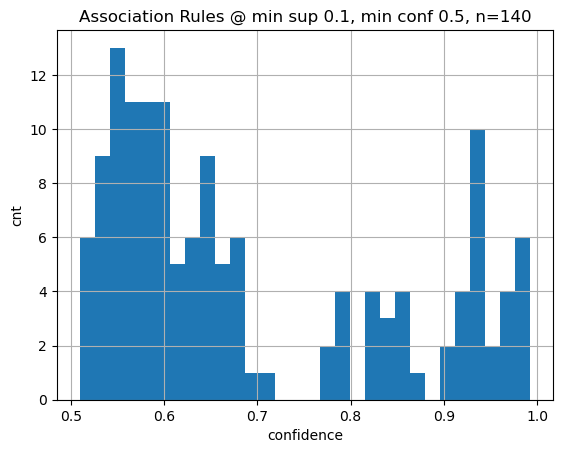

In [20]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

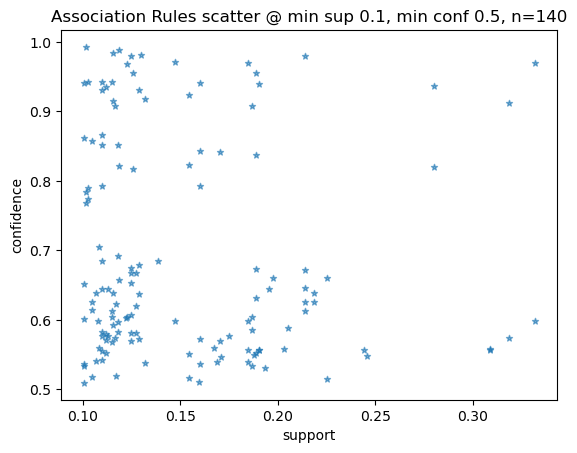

In [21]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

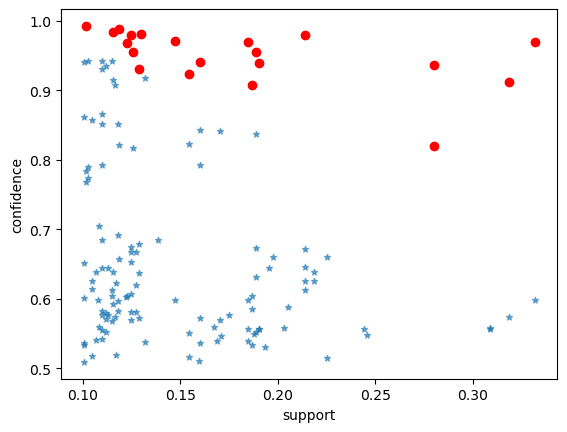

In [22]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
#plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [23]:
top_20_rules #[52, 62, 63, 88, 66, 27]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
21,((부위)손가락),(예리함·마감처리 불량),0.342057,0.554368,0.331736,0.969828,1.749430,0.142111,14.769522,0.651097,1.301564
126,(열상(찢어짐)),(예리함·마감처리 불량),0.349060,0.554368,0.318467,0.912355,1.645757,0.124959,5.084502,0.602785,1.230821
63,(이물질(기타)),(체내 위험 이물질),0.298931,0.341320,0.280133,0.937115,2.745564,0.178102,10.474310,0.906867,1.217247
31,"(열상(찢어짐), (부위)손가락)",(예리함·마감처리 불량),0.218577,0.554368,0.214154,0.979764,1.767353,0.092982,22.021655,0.555630,1.193918
37,"(남자, (부위)손가락)",(예리함·마감처리 불량),0.190564,0.554368,0.184666,0.969052,1.748031,0.079024,14.399489,0.528674,1.153719
83,"(0-4, 이물질(기타))",(체내 위험 이물질),0.197567,0.341320,0.188721,0.955224,2.798620,0.121287,14.710530,0.800916,1.143945
91,"((부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.202359,0.341320,0.190195,0.939891,2.753697,0.121126,10.958047,0.798419,1.130086
26,"((부위)손가락, 여자)",(예리함·마감처리 불량),0.151493,0.554368,0.147070,0.970803,1.751189,0.063087,15.262901,0.505546,1.117873
50,(절상(베임)),(예리함·마감처리 불량),0.132326,0.554368,0.129746,0.980501,1.768684,0.056388,22.854563,0.500888,1.110247
30,"((부위)손가락, 0-4)",(예리함·마감처리 불량),0.120162,0.554368,0.118688,0.987730,1.781723,0.052074,36.319020,0.498666,1.106418


In [24]:
indices_to_drop = [52, 62, 63, 88, 66, 27, 82]
top_10_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

KeyError: '[52, 88, 66, 27, 82] not found in axis'

In [ ]:
top_10_rules = top_10_rules.sort_values(by='combined_value', ascending=False).head(7)

In [ ]:
# 보고서용 정렬
top_10_rules.sort_values(by='confidence', ascending=False)

## 3. top 9 분포 확인

In [ ]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_10_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [ ]:
filter = top_10_rules.lift.ge(1.4)
top_10_rules[filter].sort_values(by='lift', ascending=False)

In [ ]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_10_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [ ]:
filter = top_10_rules.leverage.ge(0.09)
top_10_rules[filter].sort_values(by='leverage', ascending=False)

In [ ]:
# 확신 관찰
# 연관규칙의 확신 분포
top_10_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음

In [ ]:
filter = top_10_rules.conviction.ge(2.2)
top_10_rules[filter].sort_values(by='conviction', ascending=False)

In [ ]:
bouns = df[(df['품목대분류']=='도서/음반 및 문구용품') & (df['위해부위']=='(부위)신체내부-소화계통(식도,위장,대장 등)')]
bouns['품목'].value_counts()

#### [종합 분석 내용]

##### 주요 발견 사항

결과적으로 **[증상]소화기계통 장기손상 및 통증** 이 발생하는 경우가 빈번함.

- (부위)신체내부-소화계통(식도,위장,대장 등), [장소]주택 - 주방, 기타 - 시설목적공간 빈번.
- 이에 따라 가공식품으로 인한 위해 사건 시의 경위 **[증상]소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), [장소]주택 - 주방, 기타 - 시설목적공간 빈번** 로 특정할 수 있음
- 이때 **위 장소에서 부위에 피해가 발생했을 때(조건), 증상이 나타난다(결과)** 는 규칙이 우세함. 

> - 기존에 제외한 빈발 항목이었던 [원인]식품 섭취에 의한 위험 및 위해와 연관지어서 생각하면, 궁극적으로 (원인, 부위, 증상)이 하나로 집결된다고 예측할 수 있음.

## 4. top 9 시각화

In [25]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html
